# 7. Feature Selection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./dataset/train_ts_feature_added.csv')
df_train['datetime_iso'] = pd.to_datetime(df_train['datetime_iso'])
df_train_date = df_train['datetime_iso']

df_test = pd.read_csv('./dataset/test_ts_feature_added.csv')
df_test['datetime_iso'] = pd.to_datetime(df_test['datetime_iso'])
df_test_date = df_test['datetime_iso']

In [3]:
df_train = df_train.drop(['datetime_iso'],axis = 1)
df_test = df_test.drop(['datetime_iso'],axis = 1)

## Correlation Analysis

<Figure size 1200x800 with 0 Axes>

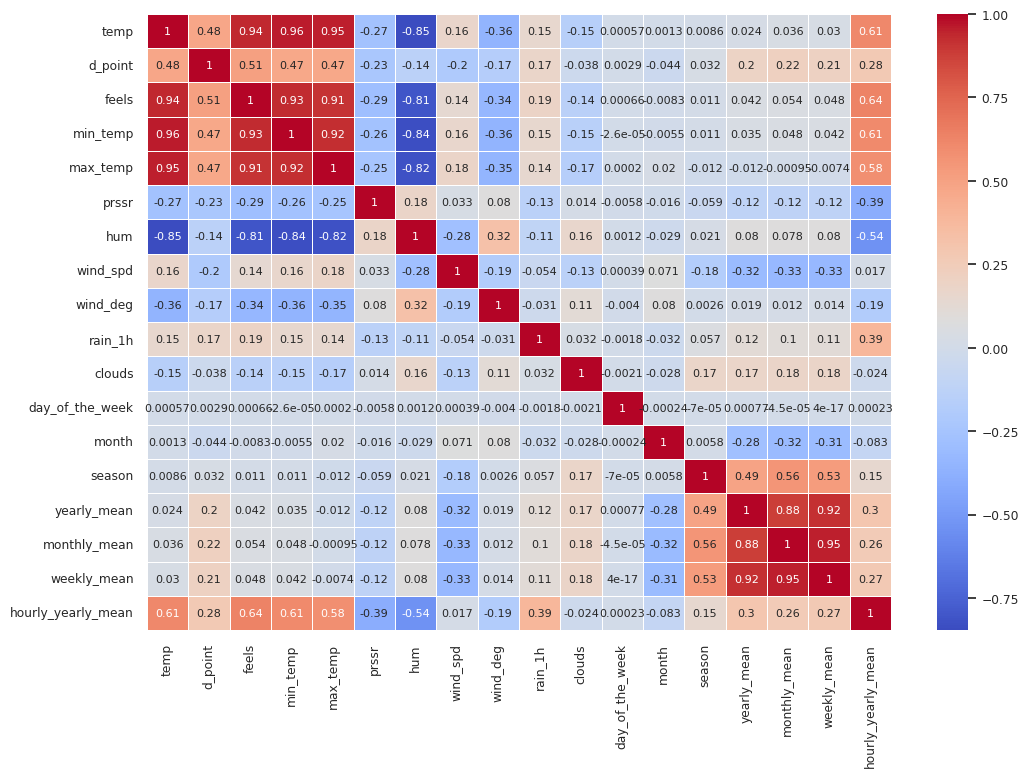

In [4]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Customize the heatmap appearance and font size
sns.set(font_scale=0.8)  # Adjust the font scale as needed
sns.set_style("whitegrid")

# Create the heatmap with smaller annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": 8})  # Adjust the "size" parameter for the font size

# Show the plot
plt.show()

## Feature Selection with Pearson Correlation

In [5]:
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

# #--
# corr_features = correlation(df_train, 0.85)

# # Untuk tau jumlah feature highly correlated
# len(set(corr_features))

# # Mengetahui Feature mana saja yang highly correlated
# corr_features

# #--

# df_train = df_train.drop(corr_features,axis=1)

In [6]:
df_train.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,day_of_the_week,month,season,yearly_mean,monthly_mean,weekly_mean,hourly_yearly_mean
0,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,0.00,100.0,0,1,1,0.492286,0.442561,0.485107,0.061282
1,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.00,100.0,0,1,1,0.492286,0.442561,0.485107,0.042564
2,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.00,99.0,0,1,1,0.492286,0.442561,0.485107,0.091538
3,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.13,94.0,0,1,1,0.492286,0.442561,0.485107,0.257179
4,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.34,100.0,0,1,1,0.492286,0.442561,0.485107,0.718974


<Figure size 1200x800 with 0 Axes>

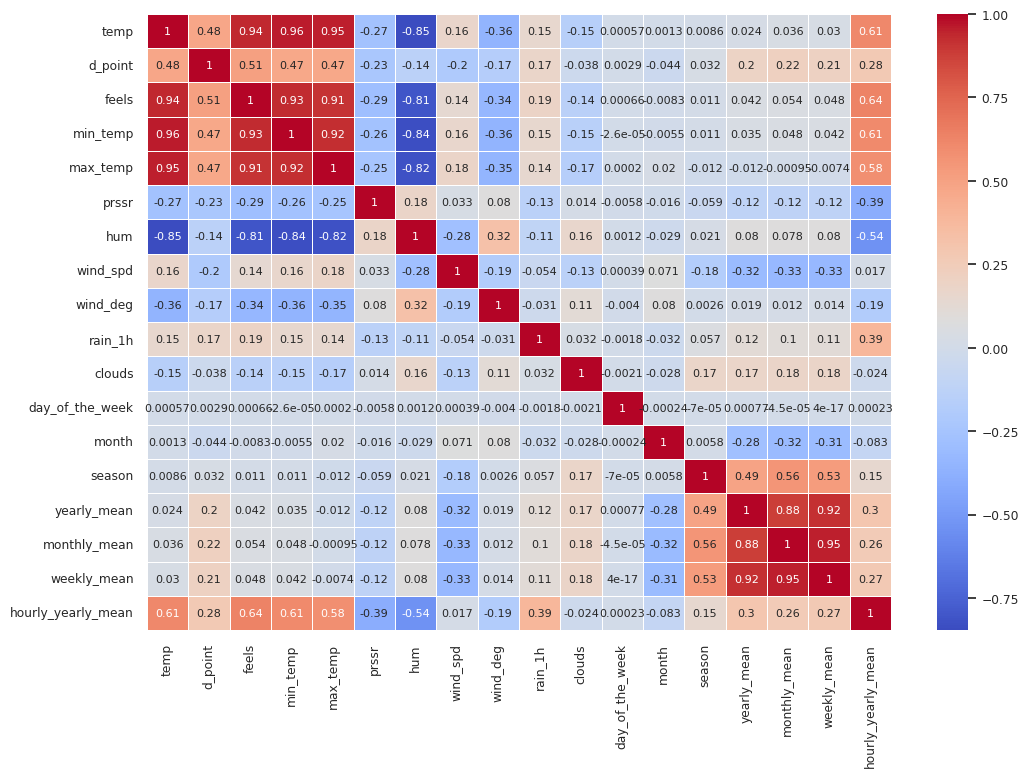

In [7]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Customize the heatmap appearance and font size
sns.set(font_scale=0.8)  # Adjust the font scale as needed
sns.set_style("whitegrid")

# Create the heatmap with smaller annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": 8})  # Adjust the "size" parameter for the font size

# Show the plot
plt.show()

# Mutual Information

In [12]:
from sklearn.feature_selection import mutual_info_regression

In [14]:
# Assuming your DataFrame is named 'df'
n_features = df_train.shape[1]
mutual_info_matrix = pd.DataFrame(index=df_train.columns, columns=df_train.columns)

for i in range(n_features):
    for j in range(n_features):
        feature1 = df_train.iloc[:, i]
        feature2 = df_train.iloc[:, j]
        if i != j:
            mutual_info = mutual_info_regression(feature1.values.reshape(-1, 1), feature2)
            mutual_info_matrix.iloc[i, j] = mutual_info[0]

In [17]:
mutual_info_matrix[['rain_1h']]

,rain_1h
temp,0.047033
d_point,0.026118
feels,0.041562
min_temp,0.044885
max_temp,0.04025
prssr,0.014253
hum,0.050103
wind_spd,0.0108
wind_deg,0.012666
rain_1h,NaN


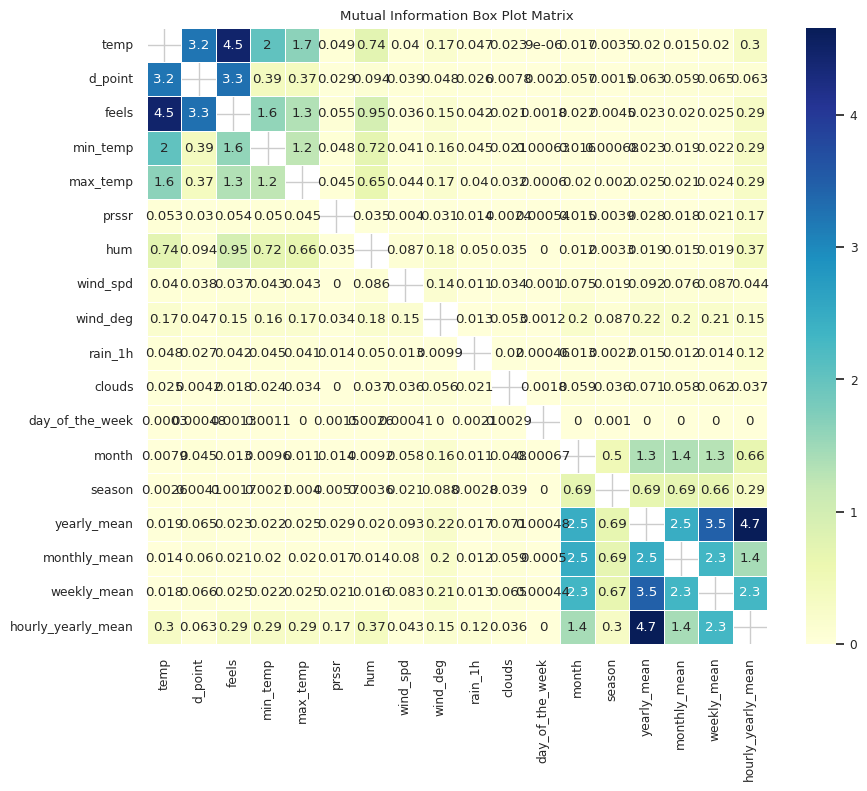

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(mutual_info_matrix.astype(float), annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Mutual Information Box Plot Matrix")
plt.show()

### Coba drop day_of_the_week deh

In [8]:
df_train.head()

,temp,d_point,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,day_of_the_week,month,season,yearly_mean,hourly_yearly_mean
0,24.75,23.89,1012.0,95.0,0.82,320.0,0.00,100.0,0,1,1,0.492286,0.061282
1,24.58,23.73,1012.0,95.0,0.96,338.0,0.00,100.0,0,1,1,0.492286,0.042564
2,26.60,24.06,1012.0,86.0,1.22,339.0,0.00,99.0,0,1,1,0.492286,0.091538
3,27.31,24.37,1012.0,84.0,1.08,342.0,0.13,94.0,0,1,1,0.492286,0.257179
4,27.41,25.05,1011.0,87.0,0.86,336.0,0.34,100.0,0,1,1,0.492286,0.718974


In [18]:
df_train = df_train.drop(['day_of_the_week','season'],axis = 1)
df_test = df_test.drop(['day_of_the_week','season'],axis = 1)

In [19]:
df_train['datetime_iso'] = df_train_date
df_test['datetime_iso'] = df_test_date

In [20]:
df_train.to_csv('./dataset/train_feature_selected.csv', index=False)
df_test.to_csv('./dataset/test_feature_selected.csv', index=False)

In [ ]:
from pycaret.regression import *
s = setup(df_train_dotw, target = 'rain_1h', session_id = 42)

In [ ]:
catboost = create_model('catboost')